# Análise dos Dados do Processo de Identificação de Code Smells

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Inappropiate Intimacy

### >> Descrição e Sintomas: Classes passam "muito tempo juntas". Uma classe usa atributos e métodos internos de outra classe. Importante ressaltar que apenas classes que já possuiam indício (num_external > 0) foram consideradas nessa análise.

### -- Projeto: commons-collections:

#### a) Visualização dos dados

In [27]:
comII = pd.read_csv('data/commonsII.csv')
comII.head(10)

,class_name,num_internal,num_external
0,ClosureUtils,16,5
1,CollectionUtils,70,26
2,ComparatorUtils,11,2
3,EnumerationUtils,3,2
4,FluentIterable,33,28
5,IterableUtils,43,33
6,IteratorUtils,77,15
7,ListUtils,24,8
8,MapUtils,95,12
9,MultiMapUtils,12,3


#### b) Descrição geral

In [28]:
comII.describe()

,num_internal,num_external
count,197.000000,197.000000
mean,23.142132,3.649746
std,17.909640,4.364065
min,1.000000,1.000000
25%,10.000000,1.000000
50%,21.000000,2.000000
75%,28.000000,4.000000
max,95.000000,33.000000


#### c) Histograma para o número de usos externos

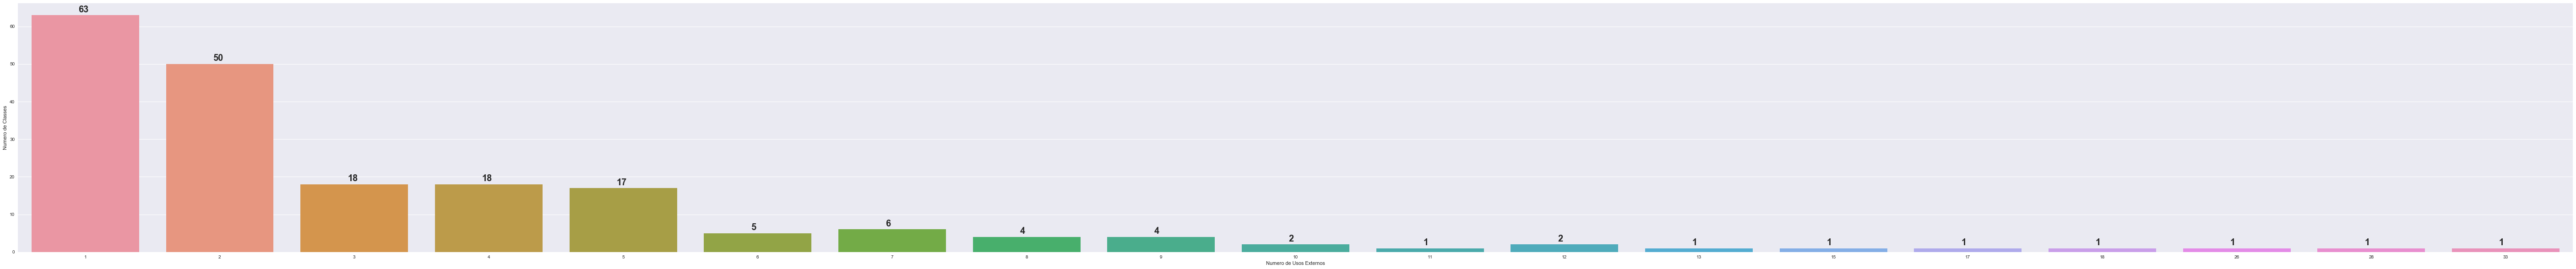

In [29]:
plt.figure(figsize = (100, 10))

numClass = comII.num_external.value_counts(sort=False).values

externalDist = comII.num_external.value_counts(sort=False).index

sns.barplot(x = externalDist, y = numClass)
plt.xlabel('Numero de Usos Externos')
plt.ylabel('Numero de Classes')

for i in range(len(numClass)):
    plt.text(i - 0.05, numClass[i] + 0.8, str(numClass[i]), size = 20, fontweight='bold')
       

plt.show()

#### d) Histograma para o número de usos internos

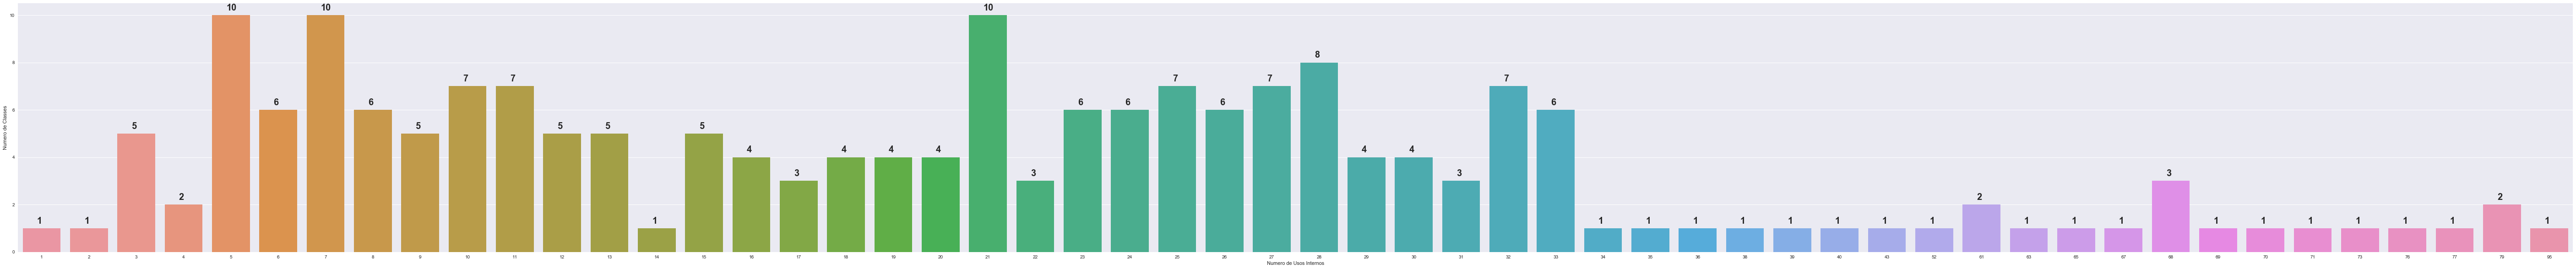

In [30]:
plt.figure(figsize = (100, 10))

numClass = comII.num_internal.value_counts(sort=False).values

internalDist = comII.num_internal.value_counts(sort=False).index

sns.barplot(x = internalDist, y = numClass)
plt.xlabel('Numero de Usos Internos')
plt.ylabel('Numero de Classes')

for i in range(len(numClass)):
    plt.text(i - 0.1, numClass[i] + 0.2, str(numClass[i]), size = 20, fontweight='bold')

plt.show()

#### e) Comparativo entre número de usos externos e internos

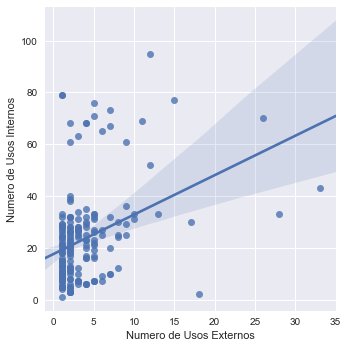

In [31]:
sns.lmplot(x = "num_external", y = "num_internal", data = comII)
plt.ylabel('Numero de Usos Internos')
plt.xlabel('Numero de Usos Externos')

plt.show()

#### f) Conclusão de Análise

Chamadas internas são mais frequentes que as externas, com a quantidade de classes com poucas chamadas externas muito maiores do que a quantidade com muitas. 
Podemos também considerar o último gráfico, observando quais classes possuem mais usos externos que internos (as que estiverem abaixo do gráfico) e atuar nelas de acordo. Em particular, classes com poucos ou nenhum uso interno, mas com alguns usos externos seriam um foco de atenção interessante. No caso deste projeto, não são muitas.

### -- Projeto: xstream:

#### a) Visualização dos dados

In [32]:
xstreamII = pd.read_csv('data/xstreamII.csv')
xstreamII.head(10)

,class_name,num_internal,num_external
0,AbstractHibernateAcceptanceTest,16,4
1,HibernateCollectionsTypeCompatibilityTest,24,7
2,HibernateReferenceTest,23,11
3,Department,6,2
4,Division,5,1
5,Person,7,2
6,Site,5,1
7,AbsoluteSingleNodeXPathReferenceTest,40,5
8,AbsoluteXPathReferenceTest,40,5
9,AbstractAcceptanceTest,14,6


#### b) Descrição geral

In [33]:
xstreamII.describe()

,num_internal,num_external
count,527.000000,527.000000
mean,16.521822,5.055028
std,14.280694,6.603289
min,1.000000,1.000000
25%,5.000000,1.000000
50%,13.000000,3.000000
75%,22.000000,6.000000
max,131.000000,69.000000


#### c) Histograma para o número de usos externos

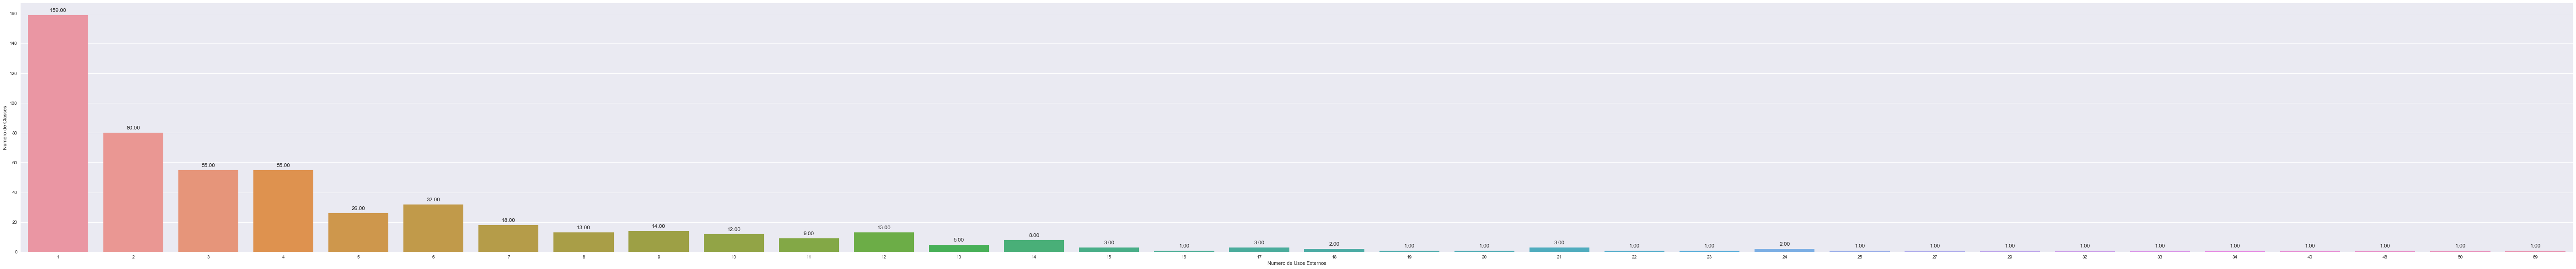

In [34]:
plt.figure(figsize = (100, 10))

numClass = xstreamII.num_external.value_counts(sort=False).values

externalDist = xstreamII.num_external.value_counts(sort=False).index

g = sns.barplot(x = externalDist, y = numClass)
plt.xlabel('Numero de Usos Externos')
plt.ylabel('Numero de Classes')

for row in g.patches:
    g.annotate(format(row.get_height(), '.2f'),
               (row.get_x() + row.get_width() / 2., row.get_height()),
               ha = 'center',
               va = 'center',
               xytext = (0, 10),
               textcoords = 'offset points')

plt.show()

#### d) Histograma para o número de usos internos

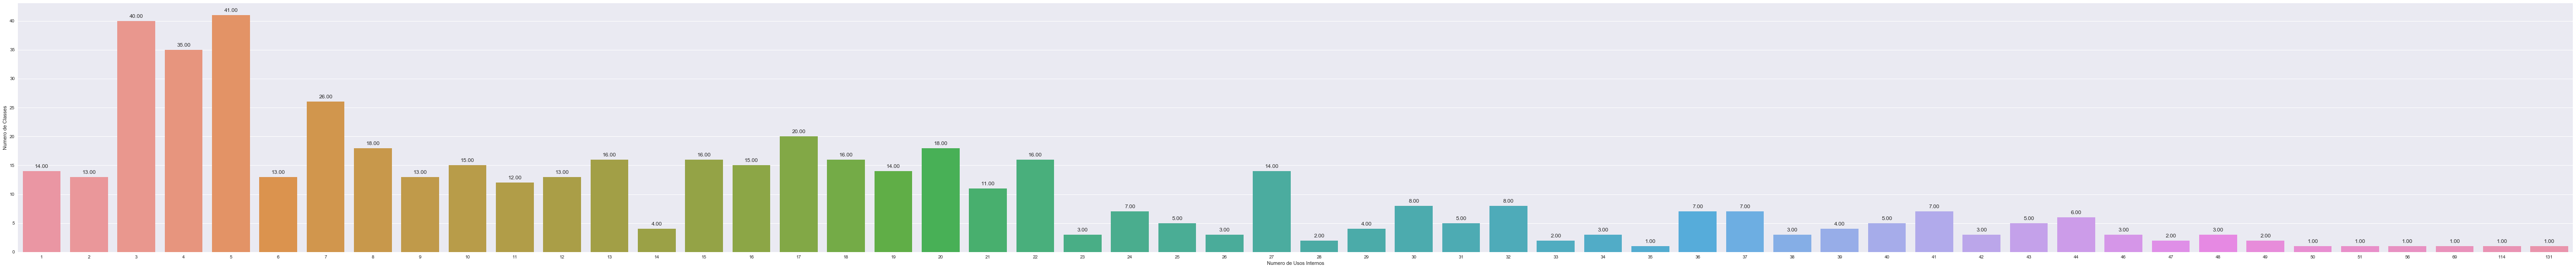

In [35]:
plt.figure(figsize = (100, 10))

numClass = xstreamII.num_internal.value_counts(sort=False).values

internalDist = xstreamII.num_internal.value_counts(sort=False).index

g = sns.barplot(x = internalDist, y = numClass)
plt.xlabel('Numero de Usos Internos')
plt.ylabel('Numero de Classes')

for row in g.patches:
    g.annotate(format(row.get_height(), '.2f'),
               (row.get_x() + row.get_width() / 2., row.get_height()),
               ha = 'center',
               va = 'center',
               xytext = (0, 10),
               textcoords = 'offset points')

plt.show()

#### e) Comparativo entre número de usos externos e internos

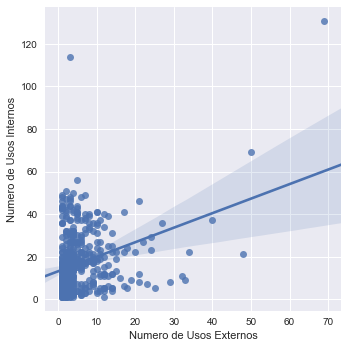

In [36]:
sns.lmplot(x = "num_external", y = "num_internal", data = xstreamII)
plt.ylabel('Numero de Usos Internos')
plt.xlabel('Numero de Usos Externos')

plt.show()

#### f) Conclusão de Análise e Comparação

Chamadas internas são mais frequentes que as externas, com a quantidade de classes com poucas chamadas externas muito maiores do que a quantidade com muitas. É bastante similar a análise do projeto commons-collection, tendo, no caso, um número de classes maior e extremos maiores tanto no quesito de usos internos quanto externos.
Podemos também considerar o último gráfico, observando quais classes possuem mais usos externos que internos (as que estiverem abaixo do gráfico) e atuar nelas de acordo. Bastante similar em formato com o caso do projeto commons-collection, há no entanto uma densidade ainda mais notável no sudoeste do gráfico, possuindo alguns casos de classes com 0 usos internos, e alguns usos externos.

## 2) Feature Envy

### >> Descrição e Sintomas: Métodos acessam mais dados de outros objetos do que dados do seu próprio objeto. É importante ressaltar que apenas os métodos que já tem indícios estão sendo analisados.

### -- Projeto: commons-collections:

#### a) Visualização dos dados

In [37]:
comFE = pd.read_csv('data/commonsFE.csv')
comFE.head(10)

,class_name,method_name,data_total,data_internal,data_external
0,AllPredicate,allPredicate,6,2,4
1,AllPredicate,allPredicate,5,2,3
2,AnyPredicate,anyPredicate,5,2,3
3,ChainedClosure,chainedClosure,3,1,2
4,ChainedTransformer,chainedTransformer,3,1,2
5,CloneTransformer,transform,2,0,2
6,NonePredicate,nonePredicate,4,1,3
7,NonePredicate,nonePredicate,3,1,2
8,OnePredicate,onePredicate,5,2,3
9,AbstractMapEntry,equals,10,2,8


#### b) Descrição geral

In [38]:
comFE.describe()

,data_total,data_internal,data_external
count,42.000000,42.000000,42.000000
mean,5.857143,1.690476,4.166667
std,4.251665,1.893353,2.536722
min,2.000000,0.000000,2.000000
25%,3.000000,0.000000,2.000000
50%,4.000000,1.000000,3.000000
75%,7.500000,2.000000,4.750000
max,17.000000,7.000000,11.000000


#### c) Histograma para o número dados internos utlizados

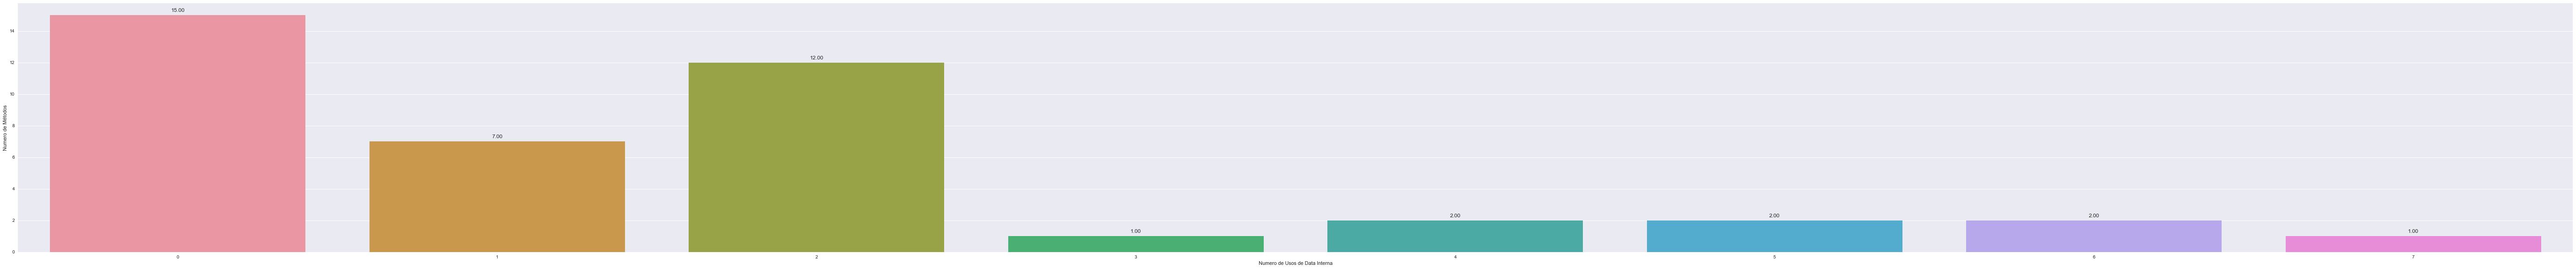

In [39]:
plt.figure(figsize = (100, 10))

numMethods = comFE.data_internal.value_counts(sort=False).values

internalDist = comFE.data_internal.value_counts(sort=False).index

g = sns.barplot(x = internalDist, y = numMethods)
plt.xlabel('Numero de Usos de Data Interna')
plt.ylabel('Numero de Métodos')

for row in g.patches:
    g.annotate(format(row.get_height(), '.2f'),
               (row.get_x() + row.get_width() / 2., row.get_height()),
               ha = 'center',
               va = 'center',
               xytext = (0, 10),
               textcoords = 'offset points')

plt.show()

#### d) Histograma para o número dados externos utlizados

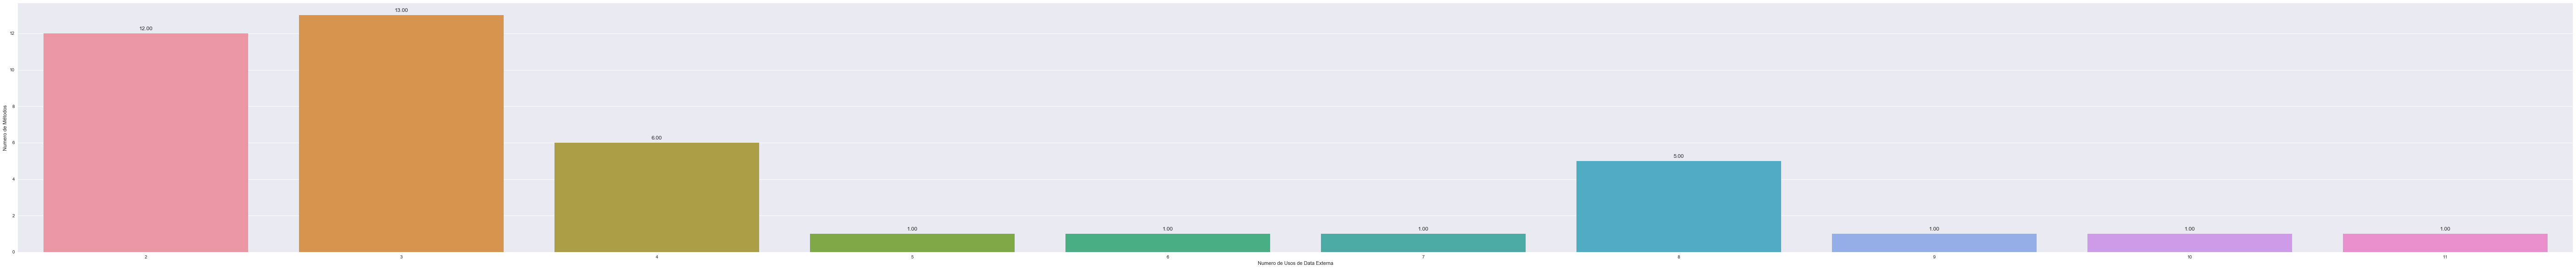

In [40]:
plt.figure(figsize = (100, 10))

numMethods = comFE.data_external.value_counts(sort=False).values

externalDist = comFE.data_external.value_counts(sort=False).index

g = sns.barplot(x = externalDist, y = numMethods)
plt.xlabel('Numero de Usos de Data Externa')
plt.ylabel('Numero de Métodos')

for row in g.patches:
    g.annotate(format(row.get_height(), '.2f'),
               (row.get_x() + row.get_width() / 2., row.get_height()),
               ha = 'center',
               va = 'center',
               xytext = (0, 10),
               textcoords = 'offset points')

plt.show()

#### e) Comparativo entre número de usos da data externa e interna

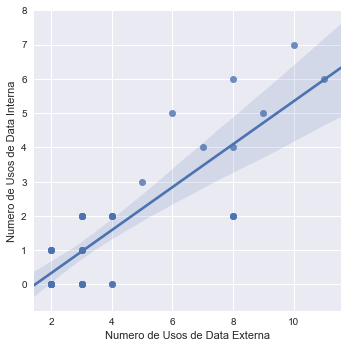

In [41]:
sns.lmplot(x = "data_external", y = "data_internal", data = comFE)
plt.ylabel('Numero de Usos de Data Interna')
plt.xlabel('Numero de Usos de Data Externa')

plt.show()

#### f) Conclusão de Análise

O principal foco de análise são os métodos e seus usos de dados internos e externos. Poucos métodos passaram na filtragem geral, isso é, não parecem haver muitos indícios desse smell no commons-collections. Verifica-se uma quantidade considerável de métodos que sequer usam sua data interna, usando apenas dados externos. Esses casos podem ser especialmente importantes.

### -- Projeto: xstream:

#### a) Visualização dos dados

In [42]:
xstreamFE = pd.read_csv('data/xstreamFE.csv')
xstreamFE.head(10)

,class_name,method_name,data_total,data_internal,data_external
0,AbstractHibernateAcceptanceTest,createXStream,10,0,10
1,HibernateReferenceTest,setUp,16,6,10
2,ImplicitMapTest,createXStream,5,1,2
3,XStreamBuilderAnnotationsTest,testHandleCorrectlyAnnotatedClasses,7,1,5
4,AliasTest,testCanAliasArrayElements,10,4,6
5,AliasTest,testIdentityForFields,10,4,6
6,AliasTest,testForSystemAttributes,15,7,8
7,CglibCompatibilityTest,createXStream,9,2,7
8,CollectionsTest,testListsCanContainCustomObjects,18,8,10
9,ConcreteClassesTest,testDefaultImplementationOfInterface,5,2,3


#### b) Descrição geral

In [43]:
xstreamFE.describe()

,data_total,data_internal,data_external
count,216.000000,216.000000,216.000000
mean,10.925926,3.990741,6.597222
std,10.941029,5.128117,6.079305
min,2.000000,0.000000,1.000000
25%,5.000000,1.000000,3.000000
50%,9.000000,3.000000,5.000000
75%,13.000000,5.000000,8.000000
max,111.000000,54.000000,57.000000


#### c) Histograma para o número dados internos utlizados

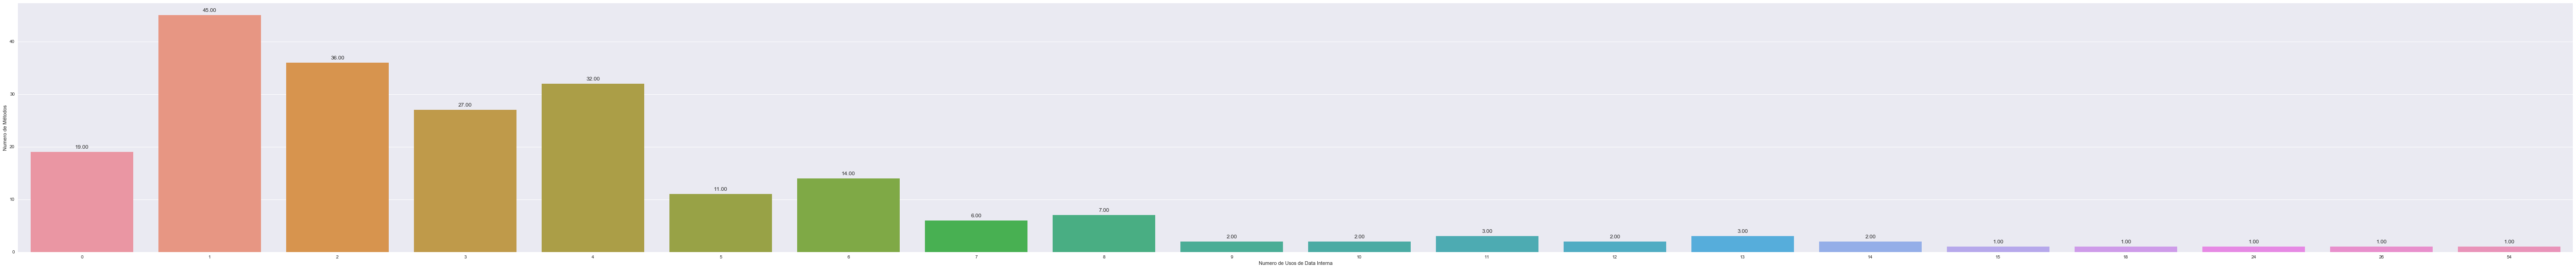

In [44]:
plt.figure(figsize = (100, 10))

numMethods = xstreamFE.data_internal.value_counts(sort=False).values

internalDist = xstreamFE.data_internal.value_counts(sort=False).index

g = sns.barplot(x = internalDist, y = numMethods)
plt.xlabel('Numero de Usos de Data Interna')
plt.ylabel('Numero de Métodos')

for row in g.patches:
    g.annotate(format(row.get_height(), '.2f'),
               (row.get_x() + row.get_width() / 2., row.get_height()),
               ha = 'center',
               va = 'center',
               xytext = (0, 10),
               textcoords = 'offset points')

plt.show()

#### d) Histograma para o número dados externos utlizados

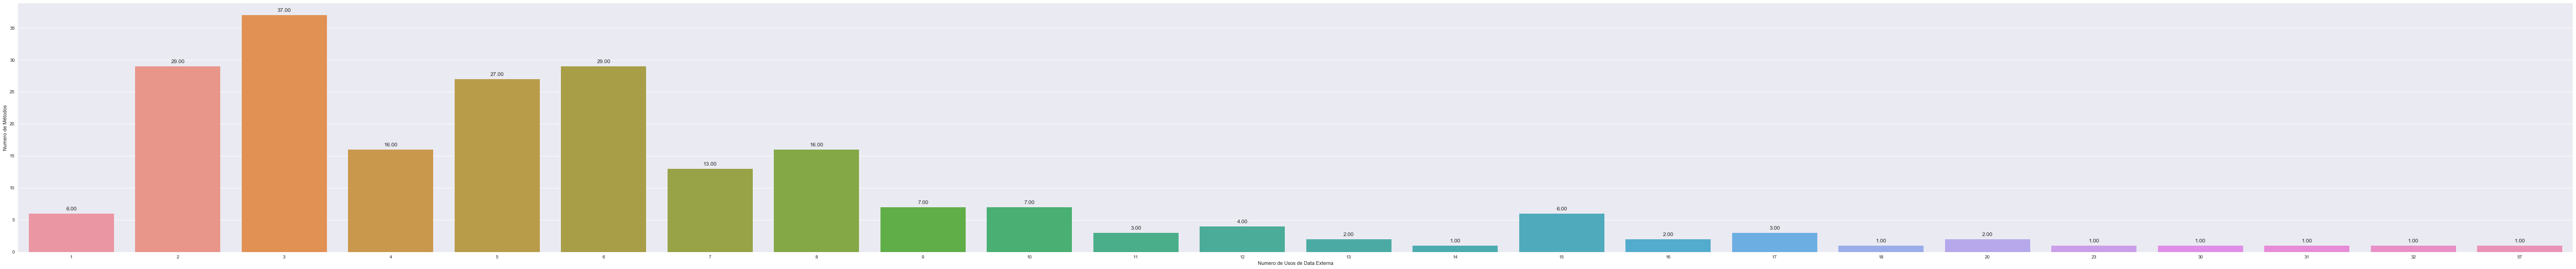

In [45]:
plt.figure(figsize = (100, 10))

numMethods = xstreamFE.data_external.value_counts(sort=False).values

externalDist = xstreamFE.data_external.value_counts(sort=False).index

g = sns.barplot(x = externalDist, y = numMethods)
plt.xlabel('Numero de Usos de Data Externa')
plt.ylabel('Numero de Métodos')

for row in g.patches:
    g.annotate(format(row.get_height(), '.2f'),
               (row.get_x() + row.get_width() / 2., row.get_height()),
               ha = 'center',
               va = 'center',
               xytext = (0, 10),
               textcoords = 'offset points')

plt.show()

#### e) Comparativo entre número de usos da data externa e interna

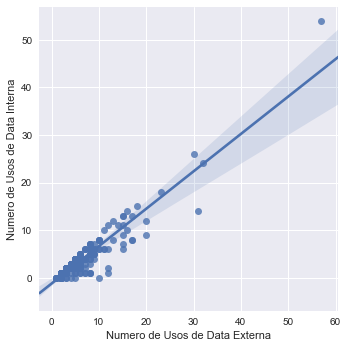

In [46]:
sns.lmplot(x = "data_external", y = "data_internal", data = xstreamFE)
plt.ylabel('Numero de Usos de Data Interna')
plt.xlabel('Numero de Usos de Data Externa')

plt.show()

#### f) Conclusão de Análise

O principal foco de análise são os métodos e seus usos de dados internos e externos. Nesse projeto do xstream, massaram uma quantidade bem maior de métodos, mas sendo um projeto maior, não é algo inesperado. 
Apesar da quantidade de métodos que não usam dados internos ser bem similar ao do commons-collections, mesmo sendo um projeto maior, alguns desses casos usam ainda mais dados externos, podendo chegar a 10 usos de dados externos e sem nenhum dado interno.